# Project 5

In [1]:
#First I will bring in my imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# function for merging data

def get_merged_dataframes(main_df, main_df_columns, csv_files, year, merge_columns):
    
    df1 = pd.read_csv(f'./data/{year}_fars/{main_df}.csv', encoding='unicode_escape')
    df1.columns = df1.columns.str.lower()
    merged_dataframe = df1[df1.columns.intersection(main_df_columns)]
    
    for csv in csv_files:
        try:
            df2 = pd.read_csv(f'./data/{year}_fars/{csv}.csv')
            df2.columns = df2.columns.str.lower() 
            merged_dataframe = pd.merge(merged_dataframe, df2, how='outer', on=merge_columns, suffixes=('', '_remove'))
            merged_dataframe = merged_dataframe.drop([column for column in merged_dataframe.columns if 'remove' in column], axis=1)
        except FileNotFoundError:
            print(f'The {csv} file does not exist for the year {year}.')           
    
    merged_dataframe.loc[:,'data_year'] = year
    
    return merged_dataframe

In [3]:
def combine_person_data(start_year, end_year=None):  
    
    columns = ['state', 'peds', 've_total', 'persons', 'county', 'day', 'month', 'hour', 'minute', 'week', 'tway_id', 'route', 'rur_urb', 
               'rd_owner','nhs', 'sp_jur', 'milept', 'latitude', 'longitude', 'harm', 
               'man_coll', 'reljct1', 'reljct2', 'typ_int', 'rel_road', 'wrk_zone', 'lgt_cond', 
               'sch_bus', 'rail', 'not_hour', 'arr_hour', 'hosp_hr',
              'eventnum', 'vnumber1', 'aoi1', 'soe', 'vnumber2', 'aoi2',
              'weather', 'crashrf', 'st_case', 'drunk_dr', 'inj_sev', 'inj_sevname']
    
    csvs_to_merge = ['acc_aux', 'weather', 'crashrf', 'cevent', 'person']
    
    merge_columns = ['st_case']
    
    if end_year is None:
        end_year = start_year
    
    full_df_list = [get_merged_dataframes('accident', columns, csvs_to_merge, year, merge_columns) for year in range(start_year, end_year + 1)]
    
    return pd.concat(full_df_list, ignore_index=True)

In [4]:
accidents_df = combine_person_data(2020)

In [5]:
#Lets take a look at the columns to see if there are any interesting takeaways
pd.set_option('display.max.columns', None)
accidents_df.head(5)


,state,st_case,ve_total,peds,persons,county,day,month,hour,minute,nhs,route,tway_id,rur_urb,rd_owner,milept,latitude,sp_jur,man_coll,reljct1,reljct2,typ_int,wrk_zone,rel_road,lgt_cond,weather,sch_bus,rail,not_hour,arr_hour,hosp_hr,drunk_dr,year,fatals,a_crainj,a_region,a_ru,a_inter,a_relrd,a_intsec,a_roadfc,a_junc,a_mancol,a_tod,a_dow,a_ct,a_weather,a_lt,a_mc,a_spcra,a_ped,a_ped_f,a_pedal,a_pedal_f,a_roll,a_polpur,a_posbac,a_d15_19,a_d16_19,a_d15_20,a_d16_20,a_d65pls,a_d21_24,a_d16_24,a_rd,a_hr,a_dist,a_drowsy,bia,spj_indian,indian_res,statename,weathername,crashrf,crashrfname,eventnum,vnumber1,aoi1,aoi1name,soe,soename,vnumber2,vnumber2name,aoi2,aoi2name,ve_forms,veh_no,per_no,str_veh,dayname,monthname,hourname,minutename,rur_urbname,func_sys,func_sysname,harm_ev,harm_evname,man_collname,sch_busname,make,makename,mak_mod,body_typ,body_typname,mod_year,mod_yearname,tow_veh,tow_vehname,spec_use,spec_usename,emer_use,emer_usename,rollover,rollovername,impact1,impact1name,fire_exp,fire_expname,age,agename,sex,sexname,per_typ,per_typname,inj_sev,inj_sevname,seat_pos,seat_posname,rest_use,rest_usename,rest_mis,rest_misname,air_bag,air_bagname,ejection,ejectionname,ej_path,ej_pathname,extricat,extricatname,drinking,drinkingname,alc_det,alc_detname,alc_status,alc_statusname,atst_typ,atst_typname,alc_res,alc_resname,drugs,drugsname,drug_det,drug_detname,dstatus,dstatusname,hospital,hospitalname,doa,doaname,death_da,death_daname,death_mo,death_moname,death_yr,death_yrname,death_hr,death_hrname,death_mn,death_mnname,death_tm,death_tmname,lag_hrs,lag_hrsname,lag_mins,lag_minsname,work_inj,work_injname,hispanic,hispanicname,location,locationname,helm_use,helm_usename,helm_mis,helm_misname,vpicmake,vpicmakename,vpicmodel,vpicmodelname,vpicbodyclass,vpicbodyclassname,icfinalbody,icfinalbodyname,data_year
0,1,10001,1,0,4,51,1,1,2,58,0,4,cr-4,1,2,0,32.433133,0,0,0,1,1,0,4,2,1,0,0000000,99,3,99,1,2020,3,1,4,1,2,4,2,5,2,1,2,1,1,1,2,2,1,2,2,2,2,1,2,1,2,2,2,2,2,1,1,1,2,2,2,0,0,0,Alabama,Clear,0,None,1,1,55,Non-Harmful Event,63,Ran Off Roadway - Right,5555,Non-Harmful Event,55,Non-Harmful Event,1,1,1,0,1,January,2:00am-2:59am,58,Rural,5,Major Collector,42,Tree (Standing Only),The First Harmful Event was Not a Collision wi...,No,59.0,Lexus,Lexus ES-250/300/300h/330/ 350,4.0,"4-door sedan, hardtop",1997.0,1997,0.0,No Trailing Units,0.0,No Special Use,0.0,Not Applicable,1.0,"Rollover, Tripped by Object/Vehicle",12.0,12 Clock Point,0.0,No or Not Reported,24,24 Years,1,Male,1,Driver of a Motor Vehicle In-Transport,4,Fatal Injury (K),11,"Front Seat, Left Side",20,None Used/Not Applicable,7,None Used/Not Applicable,1,Deployed- Front,0,Not Ejected,0,Ejection Path Not Applicable,1,Extricated,9,Reported as Unknown,9,Not Reported,2,Test Given,1,Blood,294,0.294 % BAC,9,Reported as Unknown,8,Not Reported,2,Test Given,0,Not Transported for Treatment,7,Died at Scene,1,1,1,January,2020,2020,2,2:00-2:59,58,58,258,258,0,0,0,0,0,No,7,Non-Hispanic,0,Occupant of a Motor Vehicle,20,Not Applicable,7,None Used/Not Applicable,515.0,Lexus,2475.0,ES,13.0,Sedan/Saloon,0.0,Not Applicable,2020
1,1,10001,1,0,4,51,1,1,2,58,0,4,cr-4,1,2,0,32.433133,0,0,0,1,1,0,4,2,1,0,0000000,99,3,99,1,2020,3,1,4,1,2,4,2,5,2,1,2,1,1,1,2,2,1,2,2,2,2,1,2,1,2,2,2,2,2,1,1,1,2,2,2,0,0,0,Alabama,Clear,0,None,1,1,55,Non-Harmful Event,63,Ran Off Roadway - Right,5555,Non-Harmful Event,55,Non-Harmful Event,1,1,2,0,1,January,2:00am-2:59am,58,Rural,5,Major Collector,42,Tree (Standing Only),The First Harmful Event was Not a Collision wi...,No,59.0,Lexus,Lexus ES-250/300/300h/330/ 350,4.0,"4-door sedan, hardtop",1997.0,1997,0.0,No Trailing Units,0.0,No Special Use,0.0,Not Applicable,1.0,"Rollover, Tripped by Object/Vehicle",12.0,12 Clock Point,0.0,No or Not Reported,21,21 Years,1,Male,2,Passenger of a Motor Vehicle In-Transport,3,Suspected Serious Injury (A),13,"Front Seat, Right Side",3,Shoulder and Lap Belt Used,0,No Indication of Mis-Use,1,Deployed- Front,0,Not Ejected,0,Ejection Path Not Applicable,1,Extri

# More data exploration and cleaning

In [6]:
# First lets take a look at the fatals, persons, oeds columns
# To note- not everyone involved in the crashes died

accidents_df.loc[(accidents_df['fatals'] > accidents_df['persons']), ['fatals', 'persons', 'peds']]

,fatals,persons,peds
1249,2,1,2
1250,2,1,2
1251,2,1,2
1252,2,1,2
1253,2,1,2
...,...,...,...
256954,2,1,2
256955,2,1,2
256956,2,1,2
258219,1,0,1


In [7]:
# This column represents those who died at the scene or en route
# Taking a deeper look - I would need to binarize this column to make use of it
accidents_df['doaname'].unique()

array(['Died at Scene', 'Not Applicable', 'Died En Route', 'Unknown'],
      dtype=object)

In [8]:
### far too many not applicable- will have to drop column
accidents_df['doaname'].value_counts()

Not Applicable    190244
Died at Scene      71342
Unknown             2852
Died En Route        753
Name: doaname, dtype: int64

In [9]:
#the doaname column has been dropped
accidents_df = accidents_df.drop(columns=['doaname'])

In [10]:
#Let's take a look at the total number of fatals in a unique state case
# As we can see the majority of fatal accidents that occur in this data set involve one person... why?
accidents_df['fatals'].value_counts()

1    225889
2     30537
3      6284
4      1766
5       547
6       104
7        40
8        24
Name: fatals, dtype: int64

In [11]:
#here I will bin the columns to make them binary- either fatals = 1 or fatal > 1

## Make a seasons function that bins fatals
def binary_fatals(x):
    if x == 1:
        return 0
    elif x > 0:
        return 1

In [12]:
# Lets save the previous equation to the df
accidents_df['binary_fatals'] = accidents_df['fatals'].map(binary_fatals)

In [13]:
# now lets take a look at the totals
accidents_df['binary_fatals'].value_counts()

0    225889
1     39302
Name: binary_fatals, dtype: int64

In [14]:
# I want to check the correlation between inj_sev and binary_fatals
# The correlation is weak
# Lets take a closer look inj_sev
accidents_df[['binary_fatals', 'inj_sev']].corr()

,binary_fatals,inj_sev
binary_fatals,1.000000,0.082831
inj_sev,0.082831,1.000000


In [15]:
# The majority of inj_sev are denoted as fatal
# In order to get a netter understanding I need to drop some rows from this column
# I also need to binarize it
accidents_df['inj_sev'].value_counts()

4    117315
0     57797
3     33335
2     31109
1     21740
9      2743
5      1141
6        11
Name: inj_sev, dtype: int64

In [16]:
#here I will bin the columns to make them binary- either fatals = 1 or fatal > 1

## Make a seasons function that bins fatals
def inj_sev_binary(x):
    if x == 4:
        return 0
    elif x != 4:
        return 1

In [17]:
# Saving the changes to the dataframe
accidents_df['inj_sev_binary'] = accidents_df['inj_sev'].map(inj_sev_binary)

In [18]:
#Lets take a look to make sure the changes were made
accidents_df['inj_sev_binary'].unique()

array([0, 1], dtype=int64)

In [19]:
#Let's see how many there are of each
accidents_df['inj_sev_binary'].value_counts()

1    147876
0    117315
Name: inj_sev_binary, dtype: int64

In [20]:
# The correlation has improved
accidents_df[['binary_fatals', 'inj_sev']].corr()

,binary_fatals,inj_sev
binary_fatals,1.000000,0.082831
inj_sev,0.082831,1.000000


In [21]:
#accidents_df.loc[accidents_df['st_case'] == 80224].duplicated().any()

In [22]:
#accidents_df.loc[accidents_df['st_case'] == 80224, ['inj_sev', 'fatals', 'st_case', 'persons', 'peds', 'per_no', 'veh_no', 'per_typ']].duplicated().any()

In [23]:
#Lets take a closer look at the persons column along with a few others
accidents_df_persons = accidents_df.loc[accidents_df['persons'] > 5, ['inj_sev', 'fatals', 'st_case', 'persons', 'peds', 'veh_no','inj_sev_binary']]

In [24]:
# The injury severity binary column is ti;tinh towards one for every row
# Most accidents above 5 persons seems to be moderately severe
accidents_df_persons.groupby('persons').mean()

,inj_sev,fatals,st_case,peds,veh_no,inj_sev_binary
persons,,,,,,
6,1.998068,1.340397,264587.453601,0.074805,1.963352,0.778482
7,1.729460,1.338920,257677.038560,0.101183,2.198560,0.811105
8,1.792552,1.428592,275054.414039,0.096590,2.451134,0.823085
9,1.770030,1.649713,312112.722177,0.168991,2.654908,0.818430
10,1.584937,1.552301,322338.958159,0.000000,2.744770,0.844770
11,1.609426,1.713976,234937.588841,0.058505,2.957746,0.845070
12,1.459677,1.346774,344525.532258,0.000000,3.906586,0.887769
13,1.428054,1.341176,118945.976471,0.000000,3.866968,0.896833
14,1.186023,1.143885,313422.302158,0.000000,4.373073,0.918294


In [25]:
accidents_df['inj_sevname'].value_counts()

Fatal Injury (K)                117315
No Apparent Injury (O)           57797
Suspected Serious Injury (A)     33335
Suspected Minor Injury (B)       31109
Possible Injury (C)              21740
Unknown/Not Reported              2743
Injured, Severity Unknown         1141
Died Prior to Crash*                11
Name: inj_sevname, dtype: int64

In [26]:
accidents_df = accidents_df[accidents_df["inj_sevname"].str.contains("Died Prior to Crash*") == False]
accidents_df['inj_sevname'].unique()

array(['Fatal Injury (K)', 'Suspected Serious Injury (A)',
       'No Apparent Injury (O)', 'Suspected Minor Injury (B)',
       'Possible Injury (C)', 'Unknown/Not Reported',
       'Injured, Severity Unknown'], dtype=object)

In [27]:
accidents_df = accidents_df[accidents_df["inj_sevname"].str.contains("Unknown/Not Reported") == False]

In [28]:
accidents_df['inj_sevname'].unique()

array(['Fatal Injury (K)', 'Suspected Serious Injury (A)',
       'No Apparent Injury (O)', 'Suspected Minor Injury (B)',
       'Possible Injury (C)', 'Injured, Severity Unknown'], dtype=object)

In [29]:
accidents_df = accidents_df[accidents_df["inj_sevname"].str.contains("Injured, Severity Unknown") == False]
accidents_df['inj_sevname'].unique()

array(['Fatal Injury (K)', 'Suspected Serious Injury (A)',
       'No Apparent Injury (O)', 'Suspected Minor Injury (B)',
       'Possible Injury (C)'], dtype=object)

In [30]:
accidents_df = accidents_df[accidents_df['wrk_zone'] != 4]
accidents_df['wrk_zone'].unique()

array([0, 2, 1, 3], dtype=int64)

In [31]:
#here I will bin the columns to make them binary- either drunk or not drunk

## Make a seasons function that bins months into seasons
def work_zone_binary(x):
    if x == 0:
        return 0
    elif x != 0:
        return 1

In [32]:

accidents_df['work_zone_binary'] = accidents_df['wrk_zone'].map(work_zone_binary) 

In [33]:
accidents_df['work_zone_binary'].unique()

array([0, 1], dtype=int64)

In [34]:
accidents_df[['binary_fatals', 'work_zone_binary']].corr()

,binary_fatals,work_zone_binary
binary_fatals,1.000000,0.007718
work_zone_binary,0.007718,1.000000


In [35]:
accidents_df['lgt_cond'].unique()

array([2, 3, 1, 5, 4, 9, 6, 8, 7], dtype=int64)

In [36]:
accidents_df = accidents_df[accidents_df['lgt_cond'] != 9]
accidents_df['lgt_cond'].unique()

array([2, 3, 1, 5, 4, 6, 8, 7], dtype=int64)

In [37]:
accidents_df = accidents_df[accidents_df['lgt_cond'] != 8]
accidents_df['lgt_cond'].unique()

array([2, 3, 1, 5, 4, 6, 7], dtype=int64)

In [38]:
accidents_df = accidents_df[accidents_df['lgt_cond'] != 7]
accidents_df['lgt_cond'].unique()

array([2, 3, 1, 5, 4, 6], dtype=int64)

In [39]:
#here I will bin the columns to make them binary- either drunk or not drunk

## Make a seasons function that bins months into seasons
def lgt_cond_binary(x):
    if x == 1:
        return 0
    elif x != 1:
        return 1

In [40]:
accidents_df['lgt_cond_binary'] = accidents_df['lgt_cond'].map(lgt_cond_binary) 

In [41]:
accidents_df['work_zone_binary'].unique()

array([0, 1], dtype=int64)

In [42]:
accidents_df[['binary_fatals', 'lgt_cond_binary']].corr()

,binary_fatals,lgt_cond_binary
binary_fatals,1.000000,0.000918
lgt_cond_binary,0.000918,1.000000


In [43]:
accidents_df[['binary_fatals', 'hour']].corr()

,binary_fatals,hour
binary_fatals,1.000000,-0.000175
hour,-0.000175,1.000000


In [44]:
accidents_df.groupby('inj_sevname')['fatals'].mean()

inj_sevname
Fatal Injury (K)                1.248047
No Apparent Injury (O)          1.109554
Possible Injury (C)             1.147678
Suspected Minor Injury (B)      1.157776
Suspected Serious Injury (A)    1.237976
Name: fatals, dtype: float64

In [45]:
accidents_df.groupby('fatals')['inj_sev'].mean()

fatals
1    2.428551
2    2.828426
3    3.066913
4    3.370392
5    3.233397
6    3.840000
7    3.400000
8    4.000000
Name: inj_sev, dtype: float64

In [46]:
accidents_df['fatals'].unique()

array([3, 1, 2, 4, 8, 6, 5, 7], dtype=int64)

In [47]:
accidents_df[['drunk_dr']]

,drunk_dr
0,1
1,1
2,1
3,1
4,1
...,...
265186,0
265187,0
265188,0
265189,0


In [48]:
accidents_df['drunk_dr'].unique()

array([1, 0, 2, 3, 4], dtype=int64)

In [49]:
#here I will bin the columns to make them binary- either drunk or not drunk

## Make a seasons function that bins months into seasons
def drunk(x):
    if x == 0:
        return 0
    elif x != 0:
        return 1
    

In [50]:
accidents_df['drunk'] = accidents_df['drunk_dr'].map(drunk)

In [51]:
accidents_df['drunk'].unique()

array([1, 0], dtype=int64)

In [52]:
accidents_df['drunk'].value_counts()

0    186553
1     70519
Name: drunk, dtype: int64

In [53]:
accidents_df[['drunk', 'inj_sev']].corr()

,drunk,inj_sev
drunk,1.000000,0.101006
inj_sev,0.101006,1.000000


In [54]:
accidents_df['inj_sevname'].unique()

array(['Fatal Injury (K)', 'Suspected Serious Injury (A)',
       'No Apparent Injury (O)', 'Suspected Minor Injury (B)',
       'Possible Injury (C)'], dtype=object)

In [55]:
#lets take a look at the missing values
missin_values_count = pd.DataFrame({'Null': accidents_df.isnull().sum()})
missin_values_count.sort_values(by= 'Null', ascending = False)

,Null
make,16113
fire_expname,16113
impact1name,16113
impact1,16113
rollovername,16113
...,...
spj_indian,0
indian_res,0
statename,0
weathername,0


In [56]:
accidents_df['lgt_cond'].unique()

array([2, 3, 1, 5, 4, 6], dtype=int64)

# Great! There are no null values! 

In [57]:
# sns.set(font_scale=.4, style='white')
# corr = accidents_df.drop(columns = ['fatals']).corr()
# mask = np.zeros_like(corr, dtype= bool)
# mask[np.triu_indices_from(mask)] = True
# f, ax = plt.subplots(figsize=(25,25))
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidth=.5,
#            cbar_kws={'shrink': .5}, annot = True);

In [58]:
#accidents_df.info()

In [59]:
#accidents_df.isnull().sum()

In [60]:
#accidents_df['crashrf'].isnull().sum()

In [61]:
#accidents_df.drop(columns='crashrfname', inplace=True)

In [62]:
#accidents_df.head()

In [63]:
#accidents_df['county'].unique()

In [64]:
accidents_df[['fatals', 'weather']].corr()

,fatals,weather
fatals,1.000000,-0.007273
weather,-0.007273,1.000000


In [65]:
accidents_df[['weather']]

,weather
0,1
1,1
2,1
3,1
4,1
...,...
265186,6
265187,6
265188,6
265189,6


In [66]:
#accidents_df[['vnumber2', 'fatals', 'aoi2']].corr()

In [67]:
#accidents_df.groupby('state')['fatals'].agg(['count', 'mean'])

In [68]:
# Here I want to clean the work zone column and see if there is a corr between that and fatals
accidents_df['wrk_zone'].unique()

array([0, 2, 1, 3], dtype=int64)

#### Let's take a look at the correlations between X features and Y(fatals)

In [69]:
correlations = accidents_df.corr()['binary_fatals'].sort_values(ascending = False)
correlations

binary_fatals    1.000000
fatals           0.872888
persons          0.201581
per_no           0.146894
doa              0.117993
                   ...   
lag_hrs         -0.080950
lag_mins        -0.091552
year                  NaN
a_crainj              NaN
data_year             NaN
Name: binary_fatals, Length: 136, dtype: float64

In [70]:
pd.set_option('display.max.columns', None)
correlations.head(29)

binary_fatals    1.000000
fatals           0.872888
persons          0.201581
per_no           0.146894
doa              0.117993
fire_exp         0.108002
seat_pos         0.106745
a_ct             0.105935
inj_sev          0.103747
ve_total         0.100664
ve_forms         0.092218
eventnum         0.091395
a_mancol         0.082711
a_mc             0.079400
peds             0.059763
drinking         0.058062
veh_no           0.057839
a_hr             0.049823
man_coll         0.047103
per_typ          0.044444
a_ped            0.044441
vnumber1         0.043959
drugs            0.042447
helm_mis         0.042149
a_ped_f          0.040071
extricat         0.039228
bia              0.032168
hispanic         0.030579
a_pedal          0.030061
Name: binary_fatals, dtype: float64

In [71]:
correlations2 = accidents_df.corr()['inj_sev_binary'].sort_values(ascending = False)
correlations2

inj_sev_binary    1.000000
death_mo          0.956085
death_yr          0.955728
death_da          0.943833
lag_hrs           0.920259
                    ...   
doa              -0.699278
inj_sev          -0.833264
year                   NaN
a_crainj               NaN
data_year              NaN
Name: inj_sev_binary, Length: 136, dtype: float64

In [72]:
pd.set_option('display.max.columns', None)
correlations2.head(40)

inj_sev_binary      1.000000
death_mo            0.956085
death_yr            0.955728
death_da            0.943833
lag_hrs             0.920259
death_tm            0.901124
death_hr            0.901080
lag_mins            0.891601
death_mn            0.838143
work_inj            0.828424
alc_res             0.424592
persons             0.345023
a_ct                0.337104
veh_no              0.334827
ve_forms            0.283374
ve_total            0.282724
a_mancol            0.212092
a_rd                0.206076
per_no              0.197930
vnumber1            0.156433
seat_pos            0.145476
hospital            0.138576
helm_mis            0.125556
drug_det            0.123566
a_posbac            0.121060
alc_det             0.114681
sex                 0.103914
man_coll            0.097483
tow_veh             0.093987
peds                0.072816
eventnum            0.068544
a_ru                0.068477
a_roll              0.058994
age                 0.047806
rur_urb       

In [73]:
accidents_df = accidents_df.drop(columns=['tway_id', 'statename', 'weathername', 'year', 'aoi1name', 'soename', 'vnumber2name', 'aoi2name', 'rail', 'crashrfname'])

# Let's check to see which features would be the best to use to predict fatality 

In [131]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [135]:
features = ['inj_sev', 'persons', 'peds', 've_total', 'drunk_dr', 'inj_sev_binary', 'lgt_cond_binary', 'work_zone_binary' ]

In [136]:
X = accidents_df[features]
y = accidents_df['binary_fatals']

bestfeatures = SelectKBest(score_func=chi2, k=2)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']
print(featureScores.nlargest(10, 'Score'))


              Specs         Score
1           persons  26074.760656
0           inj_sev   2927.346604
3          ve_total   2886.277084
2              peds   2084.111283
5    inj_sev_binary    741.583297
4          drunk_dr    157.526996
7  work_zone_binary     14.987448
6   lgt_cond_binary      0.110774


### Now we will try a Feature Importance Method

[0.06360422 0.4350662  0.11512054 0.19147199 0.06976901 0.04817425
 0.04929495 0.02749885]


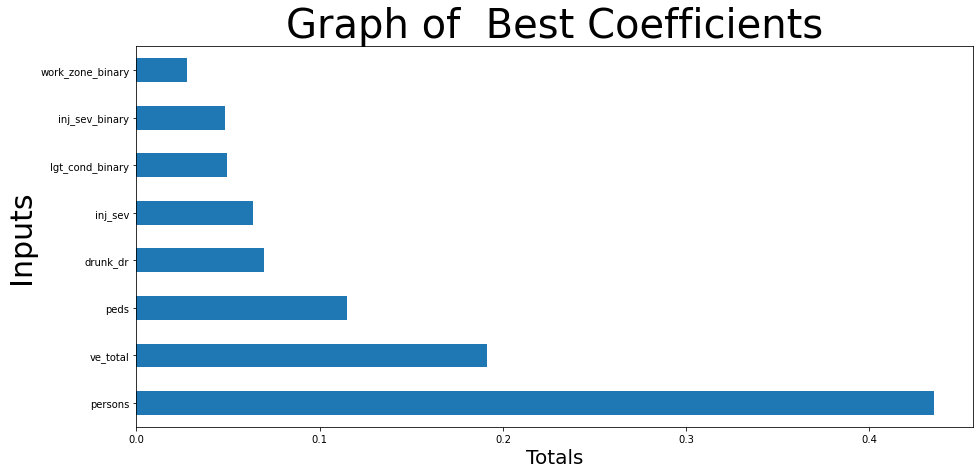

In [138]:
from sklearn.ensemble import ExtraTreesRegressor

plt.figure(figsize=(15,7))

plt.xlabel('Totals', size = 20)
plt.ylabel('Inputs', size = 30)
plt.title('Graph of  Best Coefficients', size = 40)
plt.xticks(size = 10)
plt.yticks(size = 10)

model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [78]:
#[['st_case', 'vnumber2', 'milept', 'crashrf', 'persons', 'man_coll', 'rd_owner', 'weather', 'a_weather', 'county', 'persons', 'hosp_hr', 'county', 'day', 'minute', 
 #               'month', 'hour', 'latitude', 'peds']]

#### Lets create our mini Databases

In [79]:
from scipy.stats import entropy


In [80]:
# THis db is for the chi squared version

X= accidents_df[features]

y = accidents_df[['binary_fatals']]

# drop state case from model
# add workzone/ light condition / weather/ 
# make sure to clean data from columns

In [81]:
#split data into train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42, stratify=y)

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
sc_X = StandardScaler()

X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))

X_test2 = pd.DataFrame(sc_X.transform(X_test)) #we do the feature scaling

X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

X_train = X_train2
X_test = X_test2

In [84]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=10, #criterion='crossentropy',
                              random_state=0)
tree = DecisionTreeRegressor(#criterion='crossentropy', 
                             random_state=0)
bayes = GaussianNB()
k_nn = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p =2)
log = LogisticRegression(random_state=0)

models = [forest, tree, bayes, k_nn, log]
scores = []

In [85]:
lr = LinearRegression()
lr.fit(X_train,y_train)
#try this as a regressor 

LinearRegression()

In [86]:
# Train score
lr.score(X_train,y_train)

0.08743924024804095

In [87]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [88]:
lg.score(X_train, y_train)

0.8498713877961849

In [105]:
lg.coef_

array([[ 0.45818437,  0.81304226,  0.29086116, -0.17238768,  0.11252729,
        -0.16811878]])

In [89]:
forest.fit(X_train, y_train)

<ipython-input-89-e0147d7dbc7c>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [90]:
forest.score(X_train, y_train)

0.3107465905411846

In [91]:
forest.score(X_test, y_test)

0.3106402357096866

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
knn = KNeighborsClassifier()

In [94]:
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier()

In [95]:
knn.score(X_train, y_train)

0.8629708689711509

In [96]:
knn.score(X_test, y_test)

0.8601964407274142

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
rf = RandomForestClassifier()

In [99]:
rf.fit(X_train, y_train)

<ipython-input-99-168a6fc83696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier()

In [100]:
rf.score(X_test, y_test)

0.8771564718467373

In [101]:
#accidents_df['binary_fatals'].value_counts()

In [102]:
#accidents_df['binary_fatals'].mean()

In [103]:
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import StratifiedKFold

# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# for mod in models:
#     mod.fit(X_train, y_train.values.ravel())
#     acc = cross_val_score(mod, X_train, y_train.values.ravel(),
#                          scoring = 'accuracy', cv=kfold, n_jobs=-1)
#     scores.append(acc.mean())

In [104]:
# results = pd.DataFrame({
#     'Model': ['Random Forest', 'Decision Tree', 'Naive Bayes',
#              'K Nearest Neighbor', 'Logistic Regression'],
#     'Accuracy (Chi-Squared)': scores})

# result_df = results.sort_values(by='Accuracy (Chi-Squared)',
#                                ascending=False).reset_index(drop=True)
# result_df = result_df.transpose()

In [ ]:
coef_

# Lets run the models again on injury severity

In [139]:
features = ['persons', 'peds', 've_total', 'drunk_dr', 'lgt_cond_binary', 'work_zone_binary']

In [140]:
# THis db is for the chi squared version

X= accidents_df[features]

y = accidents_df[['inj_sev_binary']]

# drop state case from model
# add workzone/ light condition / weather/ 
# make sure to clean data from columns

In [141]:
X = accidents_df[features]
y = accidents_df['inj_sev_binary']

bestfeatures = SelectKBest(score_func=chi2, k=2)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']
print(featureScores.nlargest(10, 'Score'))

              Specs         Score
0           persons  76386.771434
2          ve_total  22767.693429
1              peds   3093.861243
3          drunk_dr    920.511683
4   lgt_cond_binary    426.749213
5  work_zone_binary    396.459942


In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42, stratify=y)

In [143]:
sc_X = StandardScaler()

X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))

X_test2 = pd.DataFrame(sc_X.transform(X_test)) #we do the feature scaling

X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

X_train = X_train2
X_test = X_test2

[0.55038046 0.12645585 0.30519365 0.01039741 0.00579426 0.00177838]


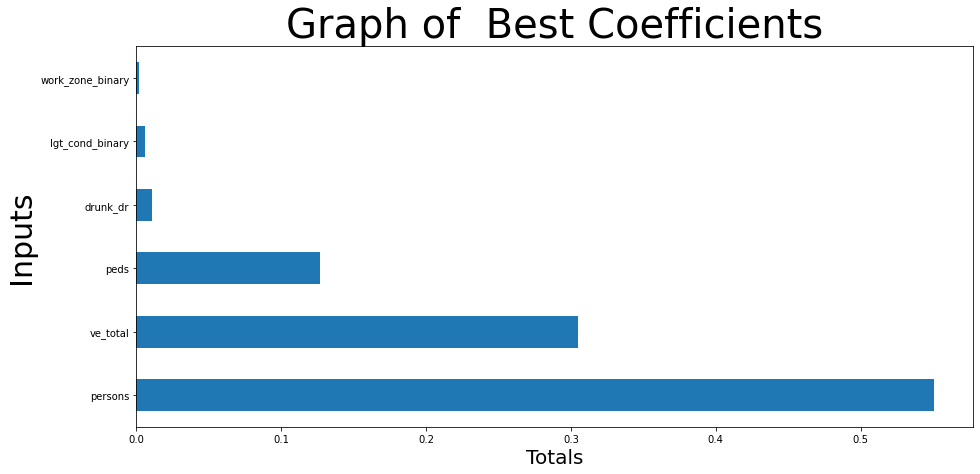

In [144]:

plt.figure(figsize=(15,7))

plt.xlabel('Totals', size = 20)
plt.ylabel('Inputs', size = 30)
plt.title('Graph of  Best Coefficients', size = 40)
plt.xticks(size = 10)
plt.yticks(size = 10)

model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [145]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

In [146]:
lg.score(X_train, y_train)

0.6923858657862363

In [147]:
lg.coef_

array([[ 1.20703697,  0.34558234,  0.16227215, -0.06590143, -0.01986731,
        -0.0045333 ]])

In [148]:
lg.score(X_test, y_test)

0.6936886122726831

In [149]:
rf = RandomForestClassifier()

In [150]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [151]:
rf.score(X_test, y_test)

0.711251580278129

In [152]:
rf.score(X_train, y_train)

0.7124727094142188

In [163]:
# Generate predictions.
preds = lg.predict(X_test)

In [164]:
y_test.shape

(51415,)

In [165]:
X_test.shape

(51415, 6)

In [166]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, plot_roc_curve, roc_auc_score, precision_score, f1_score, recall_score

In [167]:
confusion_matrix(y_test,preds)


array([[15933,  7161],
       [ 8588, 19733]], dtype=int64)

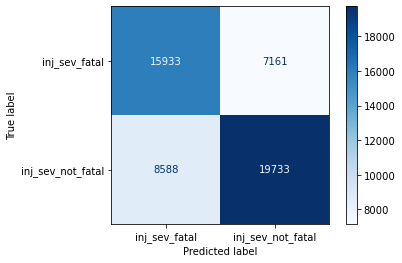

In [168]:
plot_confusion_matrix(lg, X_test, y_test, cmap='Blues', 
                      values_format='d', display_labels=['inj_sev_fatal', 'inj_sev_not_fatal']);

In [169]:
accidents_df['inj_sev_binary'].value_counts(normalize=True)

1    0.550826
0    0.449174
Name: inj_sev_binary, dtype: float64